In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import random as rm
import math

# Simulación prueba.

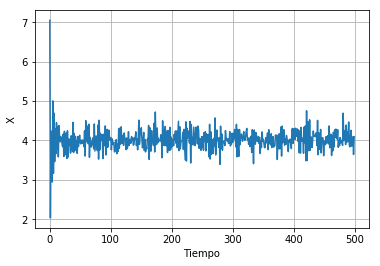

In [6]:
e_t = []

dt = 1
t = 0

x = 0
paso = 0.01
setpoint = 4

N = 1000
medicion = 500

## ------------------ ** ------------------ ##
# Asumo que tengo una partícula que esta desplazando aleatoriamente unidimensionalmente.
# Genero N movimientos al azar y los voy sumando.
# Al final tengo una posición x.
# Mi error es igual a la diferencia entre el setpoint (valor en donde quiero dejar a la particula) y la posición en donde quede.
# IMPORTANTE: Cada "N" pasos de la particula, realiza un ajuste de su posición. Esta la ajusto "medicion" veces.
T = []
X = []
K_p = 1.75
K_i = 0.5
for _ in range (medicion):
    for _ in range (N):
        val_azar = rm.uniform (-paso,paso)
        x = x + val_azar
    e_t.append (setpoint - x)
    T.append (t)
    #Factor integral que va teniendo en cuenta el paso del tiempo y el error acumulado en este.
    e_t_i = sp.integrate.simps (e_t,T)
    # Es lo mismo que e_t pero lo defino porque e_t es una lista que uso para e_t_i y e_t_1 es el valor del error en este momento
    # el cual utilizo para ajustar la posición.
    e_t_1 = setpoint - x 
    t = t + dt
    x = x + K_p * e_t_1 + K_i * e_t_i
    X.append (x)
    
## ------------------ ** ------------------ ##
plt.xlabel ("Tiempo")
plt.ylabel ("X")
plt.plot (T,X)
## ------------------ ** ------------------ ##
plt.grid()
plt.show ()

### Bloque 2: Simulación PI para Grilla periódica.

Cantidad de veces que se corrige en cada pixel: 1


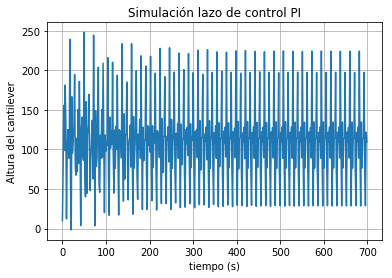

In [13]:
# Características de la grilla.
pixeles = 450
x = np.linspace (0,100,pixeles)
y = []
altura_grilla = 100

# Modelado grilla.
for i in range (len(x)):
    if i % 7 == 0:
        y.append (altura_grilla)
    elif (i - 1) % 7 == 0:
        y.append (altura_grilla)
    elif (i - 2) % 7 == 0:
        y.append (altura_grilla)
    elif (i - 3) % 7 == 0:
        y.append (altura_grilla)
    else:
        y.append (0)

## ------------------ ** ------------------ ##
# Características del lazo.
# El cantilever tiene que tener una altura mayor a la del máximo de la muestra porque sino cuando llega al valor de x tal que
# la muestra tiene altura 100, si el setpoint es menor a 100, se rompe.
setpoint = 110 

alt_canti = []
e_t = []
T = []

total = 700 # Tiempo total en recorrer la linea.
tiempo_por_pixel = total/pixeles
respuesta_lazo = 1 # Representa el tiempo que le toma al lazo corregir. 
                   # Lo fije menor al tiempo por pixel de manera tal que ajuste la altura mas de una vez en cada pixel.

## ------------------ ** ------------------ ##    
# De esta manera el lazo logra corregirse N veces en cada posición.
# Cantidad de correcciones esta dada por: a) tiempo que estoy en cada pixel, b) tiempo de respuesta del lazo.
# En este caso como el tiempo que esta en cada pixel es mayor al tiempo de respuesta del lazo, logra corregir la altura mas de 
# una vez antes de cambiar de posición.
N = int(tiempo_por_pixel/respuesta_lazo)
print ("Cantidad de veces que se corrige en cada pixel:",N)
## ------------------ ** ------------------ ##    
# Condiciones iniciales.
distancia_canti_muestra = setpoint
t = 0 
K_p = 1.6479
K_i = 1.1669

for i in range (len(x)):
    distancia_canti_muestra = distancia_canti_muestra - y[i]
    for _ in range (N):
        e_t.append (setpoint - distancia_canti_muestra) 
        T.append (t)
        e_t_i = sp.integrate.simps (e_t,T)
        e_t_1 = setpoint - distancia_canti_muestra
        alt_canti.append (distancia_canti_muestra)
        distancia_canti_muestra = distancia_canti_muestra + K_p * e_t_1 + K_i * e_t_i
    t = t + tiempo_por_pixel # i recorre cada posición x, la lista x tiene cada pixel, en cada pixel estoy tiempo_por_pixel.

plt.plot (T,alt_canti)
plt.title ("Simulación lazo de control PI")
plt.xlabel ("tiempo (s)")
plt.ylabel ("Altura del cantilever")

## ------------------ ** ------------------ ##
plt.grid ()
plt.show ()

###  Bloque 3: Misma simulación de lazo de control para grilla, pero con ajuste de parámetros Kp y Ki.

In [11]:
# AJUSTO DE A UN PARÁMETRO POR VEZ.

# Características de la grilla.
pixeles = 450
x = np.linspace (0,100,pixeles)
y = []
altura_grilla = 100

# Modelado grilla.
for i in range (len(x)):
    if i % 7 == 0:
        y.append (altura_grilla)
    elif (i - 1) % 7 == 0:
        y.append (altura_grilla)
    elif (i - 2) % 7 == 0:
        y.append (altura_grilla)
    elif (i - 3) % 7 == 0:
        y.append (altura_grilla)
    else:
        y.append (0)

## ------------------ ** ------------------ ##
# Características del lazo.
# El cantilever tiene que tener una altura mayor a la del máximo de la muestra porque sino cuando llega al valor de x tal que
# la muestra tiene altura 100, si el setpoint es menor a 100, se rompe.
setpoint = 110 

total = 700 # Tiempo total en recorrer cada linea.
tiempo_por_pixel = total/pixeles
respuesta_lazo = 1 # Representa el tiempo que le toma al lazo corregir. 
                   # Lo fije menor al tiempo por pixel de manera tal que ajuste la altura mas de una vez en cada pixel.

## ------------------ ** ------------------ ##    
# De esta manera el lazo logra corregirse N veces en cada posición.
# Cantidad de correcciones esta dada por: a) tiempo que estoy en cada pixel, b) tiempo de respuesta del lazo.
# En este caso como el tiempo que esta en cada pixel es mayor al tiempo de respuesta del lazo, logra corregir la altura mas de 
# una vez antes de cambiar de posición.
N = int(tiempo_por_pixel/respuesta_lazo)

## ------------------ ** ------------------ ##    
# Condiciones iniciales.
aux = 140 
vueltas = 1000
K_p = 1.6479
K_i = 1.1669
dt = 0.001
aux2 = []
aux3 = []
aux4 = []
for _ in range (vueltas):
    distancia_canti_muestra = setpoint
    t = 0 
    alt_canti = []
    e_t = []
    T = []
    K_i = K_i + dt
    for i in range (len(x)):
        distancia_canti_muestra = distancia_canti_muestra - y[i]
        for _ in range (N):
            e_t.append (setpoint - distancia_canti_muestra) 
            T.append (t)
            e_t_i = sp.integrate.simps (e_t,T)
            e_t_1 = setpoint - distancia_canti_muestra
            alt_canti.append (distancia_canti_muestra)
            distancia_canti_muestra = distancia_canti_muestra + K_p * e_t_1 + K_i * e_t_i
        t = t + tiempo_por_pixel # i recorre cada posición x, x tiene cada pixel, en cada pixel estoy tiempo_por_pixel.
    # En c/loop almaceno la máxima desviación del setpoint a partir de la mitad del tiempo.
    aux2.append(max(alt_canti[int((len(alt_canti)/2)):]))
    # En c/loop almaceno que K_p dió las alturas en cuestion, luego me quedo con el K_p que dio menor desviación del setpoint.
    aux4.append (K_i)
print (aux4[aux2.index(min(aux2))])

## ------------------ ** ------------------ ##

1.166999999999998
